# Building Models for Tennis Demmand Forecasting

#### Table of Contents
1. [Imports](#data-import)
2. [Get Data](#data-transformation-and-cleaning)
3. [Split Train and Test](#add-gaussian-noise)
4. [Data Visualization](#pull-multiple-pages-and-consolidate-into-a-single-df)
5. [Linear Regression Model](#linear-regression-model)
6. [ML Flow](#ml-flow)
7. [Sample Experiment: Linear Regression](#sample-experiment-linear-regression)
8. [Experiment 2: Change of model (Lasso)](#experiment-2-change-of-model-lasso-regression)
9. [More Experiment Runs](#more-runs)

#### Imports

In [39]:
# Data Processing
import numpy as np
import pandas as pd

# ML
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor

# MlFlow
import mlflow

# Data-viz
import matplotlib.pyplot as plt
import seaborn as sns

# Local modules
import os

sns.set(style='darkgrid', palette='deep')


In [3]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:8000")

In [4]:
os.sys.path.append("../src")

from process import *

In [5]:
# Environment variable

os.environ["LOGNAME"] = "santiagoal"

#### Get data

In [11]:
df_tennis = pd.read_csv("../data/processed/tennis_merged.csv")

In [12]:
df_tennis.isnull().sum()

product_price                  0
product_original_price         0
product_star_rating            0
product_num_ratings            0
product_minimum_offer_price    0
is_prime                       0
climate_pledge_friendly        0
has_variations                 0
coupon_discount                0
sales_volume                   0
dtype: int64

#### Split train and test

In [48]:
cols = list(df_tennis.columns)

input_cols
input_cols.remove("sales_volume")
output_cols = ["sales_volume"]

In [49]:
df_tennis.shape

(310, 10)

In [50]:
X = df_tennis[input_cols]
y = df_tennis[output_cols]

In [51]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42
    )
X_train, X_val, y_train, y_val = train_test_split(
        X_train_raw, 
        y_train_raw, 
        train_size=0.66, 
        random_state=42
    )

In [52]:
X_train.shape

(163, 9)

#### Data Visualization

In [18]:
df_input = df_tennis.copy().drop(labels=["sales_volume"], axis=1)

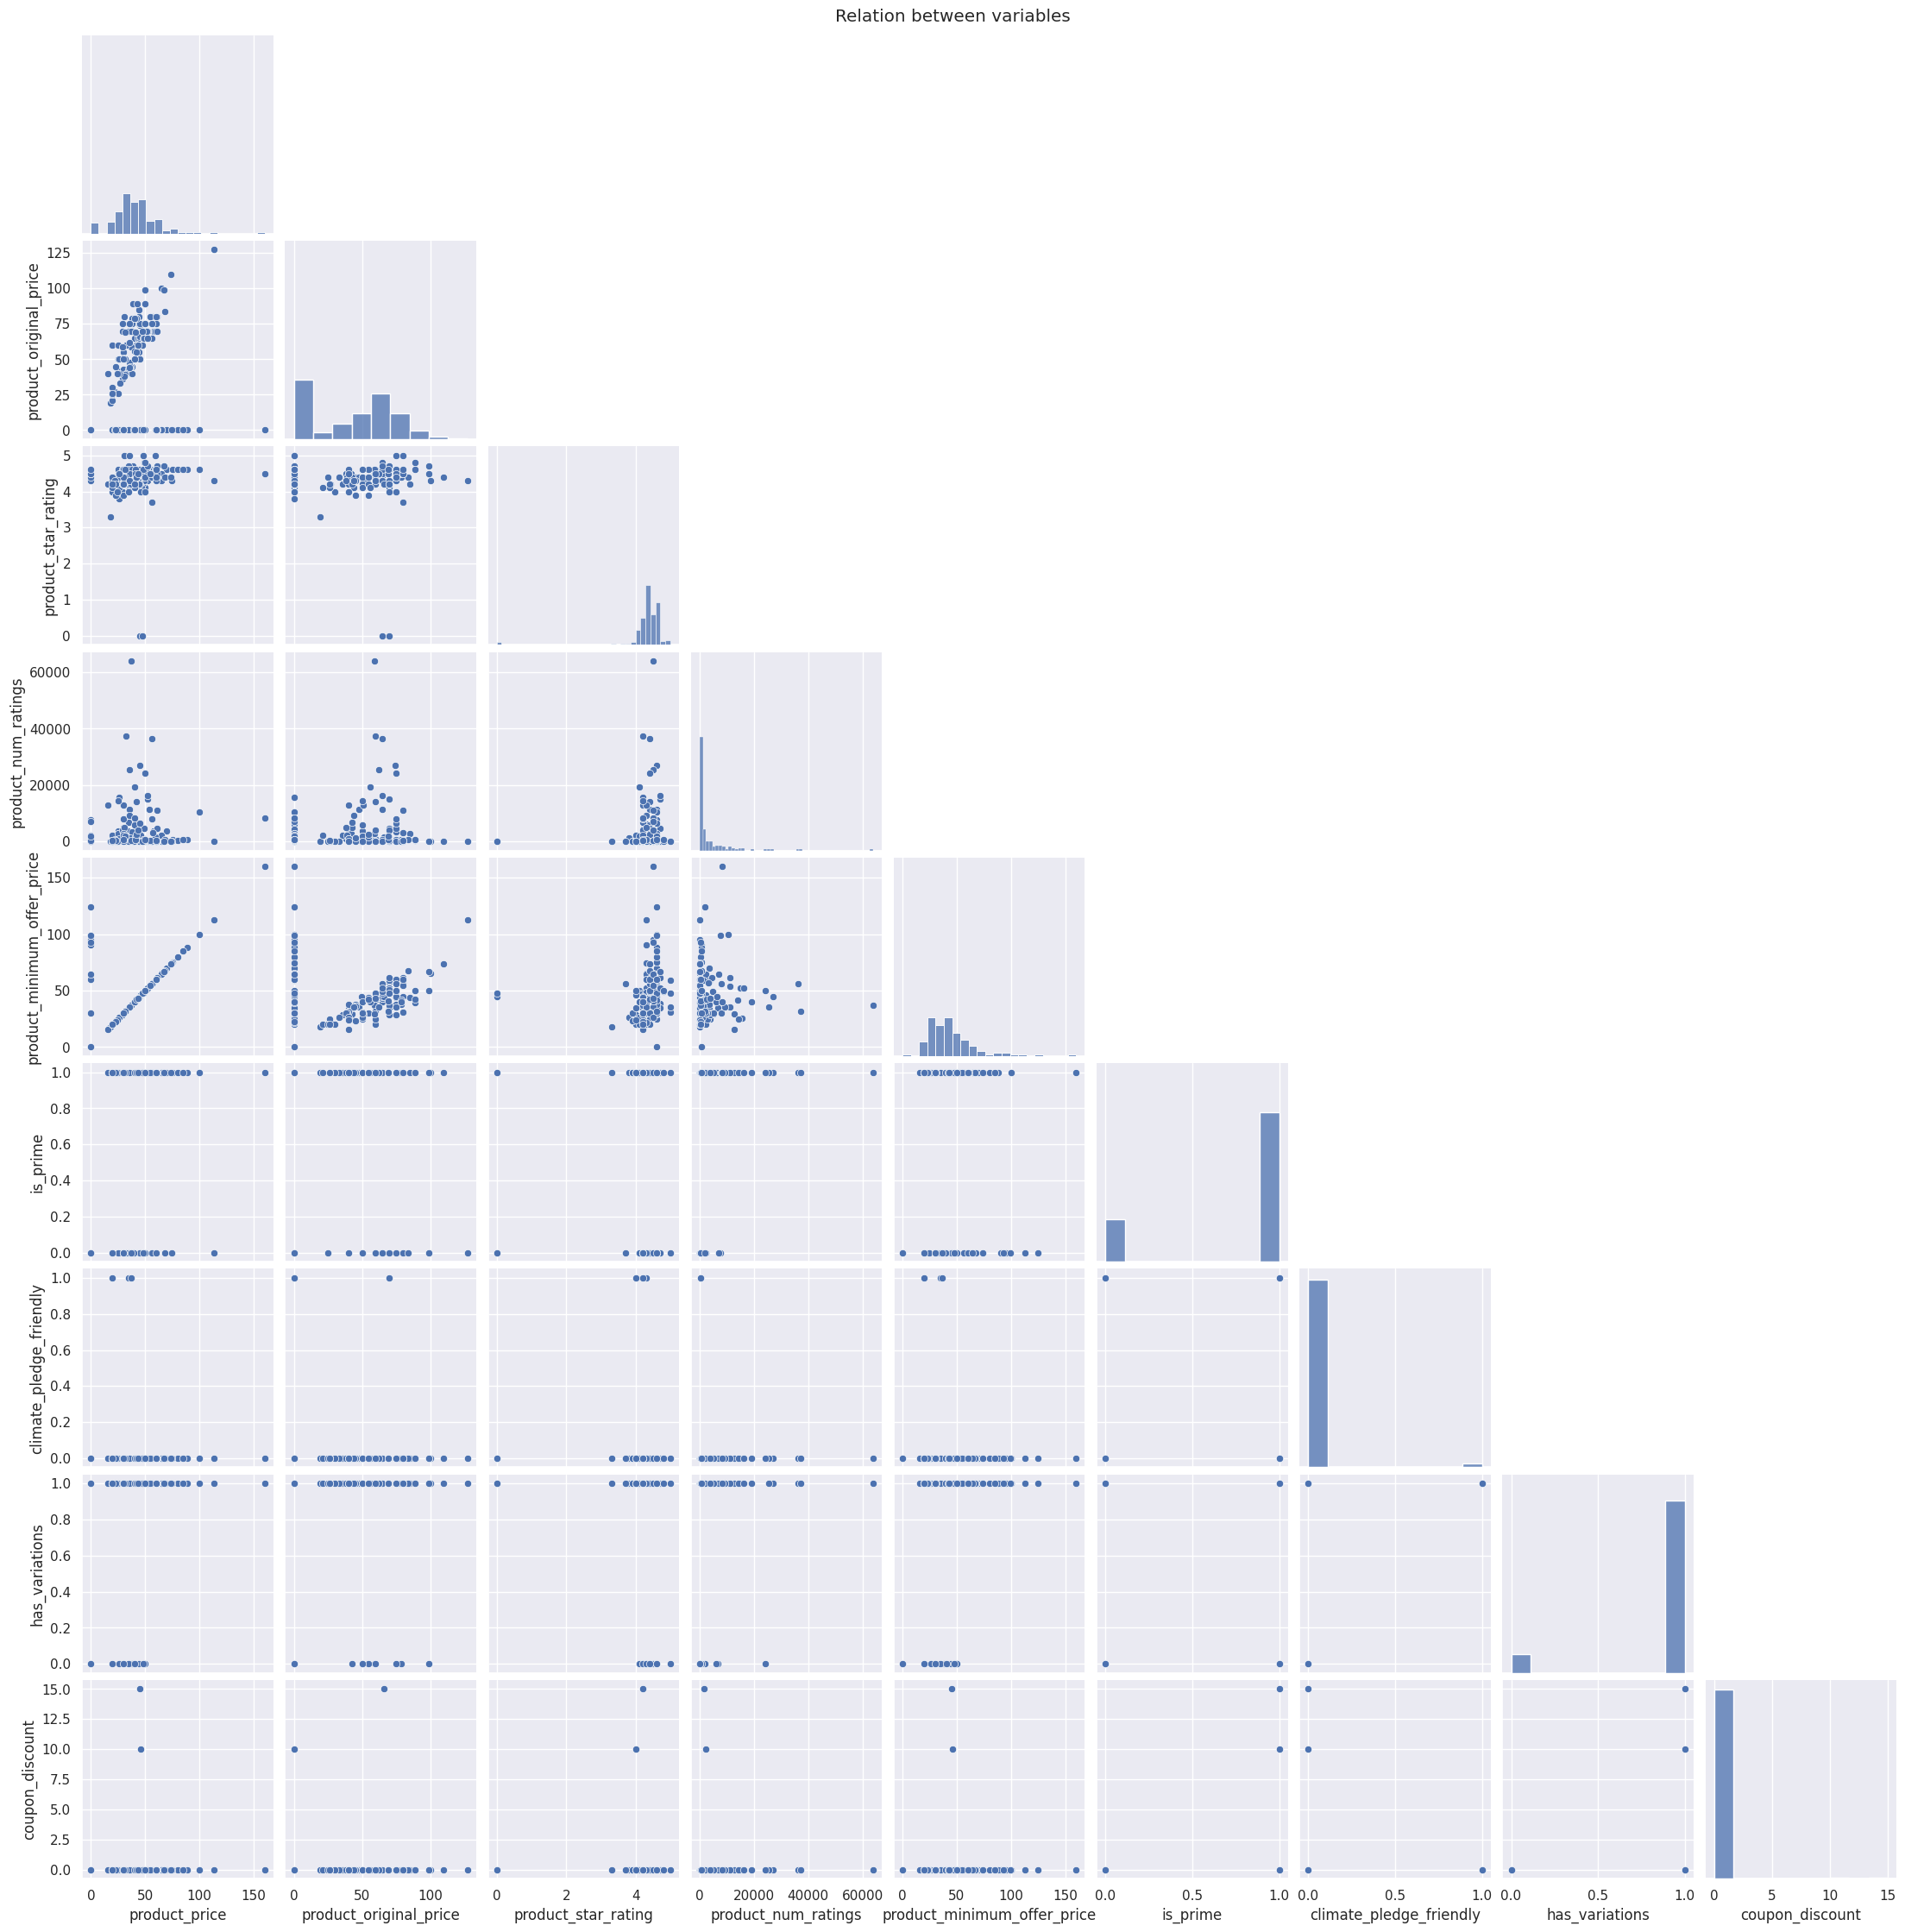

In [19]:

g = sns.pairplot(data=X_train, corner=True)

g.fig.suptitle("Relation between variables", y=1.0)


plt.show()

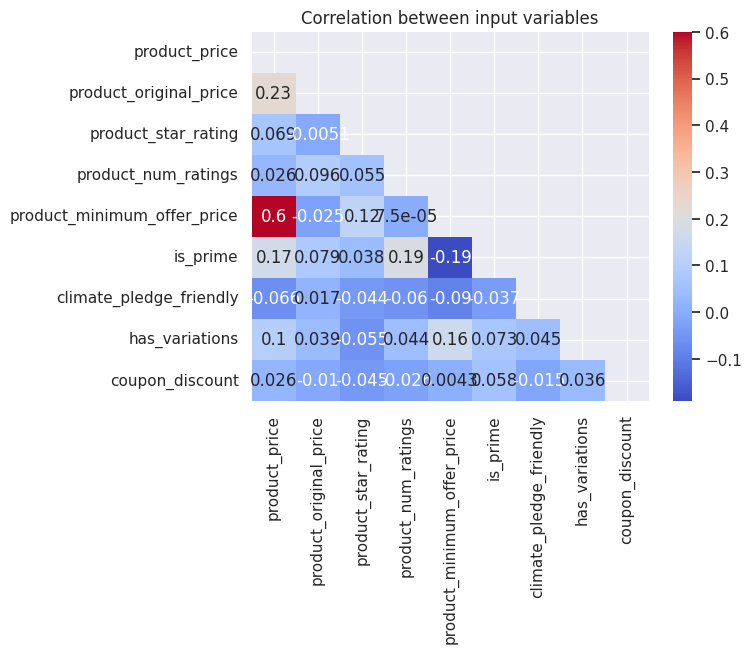

In [20]:
plt.title("Correlation between input variables")
sns.heatmap(data=X_train.corr(), cmap="coolwarm", mask=np.triu(X_train.corr()), annot=True)
plt.show()

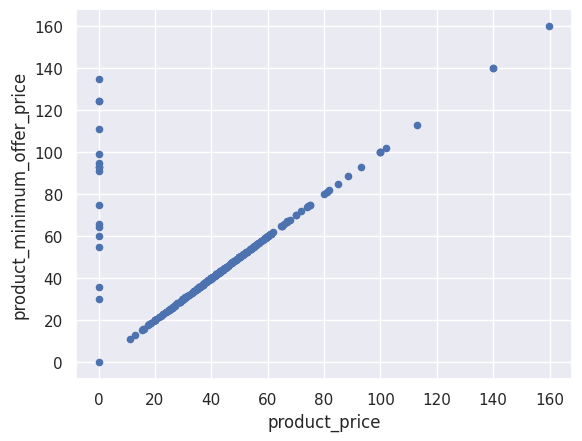

In [21]:
df_input.plot.scatter(x="product_price", y="product_minimum_offer_price")
plt.show()

In counterpart to the correlation between `product_minimum_offer_price` and `product_start_rating`:

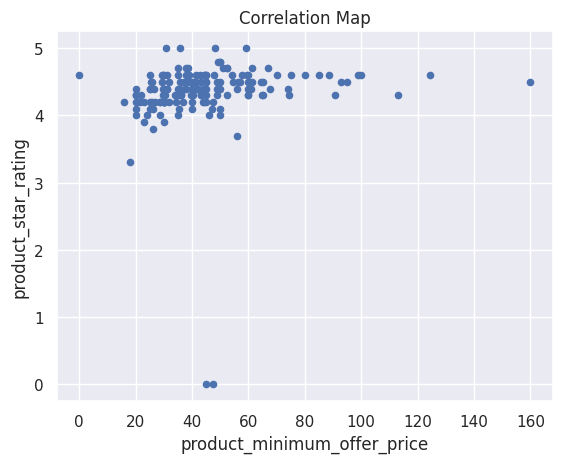

In [22]:
X_train.plot.scatter(
    x="product_minimum_offer_price",
    y="product_star_rating",
)
plt.title("Correlation Map")
plt.show()

In [23]:
X_train.drop(labels=["product_original_price", "product_minimum_offer_price"], axis=1, inplace=True)
X_val.drop(labels=["product_original_price", "product_minimum_offer_price"], axis=1, inplace=True)
X_test.drop(labels=["product_original_price", "product_minimum_offer_price"], axis=1, inplace=True)

#### Linear Regression Model

In [88]:
linear_regressor = LinearRegression()
linear_regressor.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [89]:
y_pred = linear_regressor.predict(X_val)

In [91]:
mean_squared_error(y_pred=y_pred, y_true=y_val)

np.float64(21945.88934404294)

In [92]:
root_mean_squared_error(y_pred=y_pred, y_true=y_val)

np.float64(148.14145045881972)

In [93]:
r2_score(y_true=y_val, y_pred=y_pred)

0.030442985335838002

In [94]:
X_val.columns

Index(['product_price', 'product_original_price', 'product_star_rating',
       'product_num_ratings', 'product_minimum_offer_price', 'is_prime',
       'climate_pledge_friendly', 'has_variations', 'coupon_discount'],
      dtype='object')

#### ML Flow

In [67]:
tennis_forecast_experiment_id = '779742125521330833'

#### Sample Experiment: Linear Regression

In [6]:

mlflow_client = mlflow.MlflowClient(
    tracking_uri="http://127.0.0.1:8000",
)

In [40]:

mlflow_client.create_experiment(
    name="Tennis Demand Models",
    tags={
        "date": "2024-10-10",
        "model": "Linear Regression",
        "data_details": "Tennis offers, Amazon - US"
        },
)


'996853291958282272'

In [41]:

mlflow_client.search_experiments()


[<Experiment: artifact_location='mlflow-artifacts:/996853291958282272', creation_time=1728516618738, experiment_id='996853291958282272', last_update_time=1728516618738, lifecycle_stage='active', name='Tennis Demand Models', tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'model': 'Linear Regression'}>,
 <Experiment: artifact_location='mlflow-artifacts:/779742125521330833', creation_time=1728515280628, experiment_id='779742125521330833', last_update_time=1728515280628, lifecycle_stage='active', name='Regression_Tennis_Demand', tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'model': 'Linear Regression'}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1728515039815, experiment_id='0', last_update_time=1728515039815, lifecycle_stage='active', name='Default', tags={}>]

In [35]:
mlflow.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/779742125521330833', creation_time=1728515280628, experiment_id='779742125521330833', last_update_time=1728536228878, lifecycle_stage='active', name='Tennis Demand Forecasting', tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'model': 'Linear Regression'}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1728515039815, experiment_id='0', last_update_time=1728515039815, lifecycle_stage='active', name='Default', tags={}>]

In [95]:

mlflow_client.create_run(
    experiment_id='779742125521330833',
    run_name="linear-regression-model",
    tags={
        "date": "2024-10-10",
        "model": "Linear Regression",
        "data_details": "Tennis offers, Amazon - US"
    }
)


<Run: data=<RunData: metrics={}, params={}, tags={'data_details': 'Tennis offers, Amazon - US',
 'date': '2024-10-10',
 'mlflow.runName': 'linear-regression-model',
 'model': 'Linear Regression'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/2d0ddd8e36b649288d2a711789c64a37/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='2d0ddd8e36b649288d2a711789c64a37', run_name='linear-regression-model', run_uuid='2d0ddd8e36b649288d2a711789c64a37', start_time=1728562008703, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

Submit results into MLflow


In [96]:
linear_regression_metrics = {
    "r2": r2_score(y_pred=y_pred, y_true=y_val),
    "mse": mean_squared_error(y_pred=y_pred, y_true=y_val),
    "rmse": root_mean_squared_error(y_pred=y_pred, y_true=y_val),
    "mae": mean_absolute_error(y_pred=y_pred, y_true=y_val)
}

In [33]:
X_val.product_num_ratings = X_val.product_num_ratings.astype(float)

In [97]:

with mlflow.start_run(
        experiment_id='779742125521330833',
        run_name="linear-regression-model"
    ) as run:
    mlflow.log_params(
        params=linear_regressor.get_params()
    ),
    mlflow.log_metrics(
        metrics=linear_regression_metrics
    ),
    mlflow.sklearn.log_model(
        sk_model=linear_regressor,
        input_example=X_val,
        artifact_path="linear_regression_for_tennis_demand"
    )

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/10 07:06:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run linear-regression-model at: http://127.0.0.1:8000/#/experiments/779742125521330833/runs/7161cfe1e6af4215accd19e1

#### Experiment 2: Change of Model (Lasso Regression)

In [74]:
lasso_params = {
    'alpha': 0.5
}

lasso_regressor = Lasso(**lasso_params)
lasso_regressor.fit(X_train, y_train)
y_pred = lasso_regressor.predict(X_val)

In [75]:
lasso_performance = evaluate_regression_model(
    model=lasso_regressor,
    y_pred=y_pred,
    y_true=y_val
)

06:59:08.738 | INFO    | Task run 'evaluate_regression_model' - Created task run 'evaluate_regression_model' for task 'evaluate_regression_model'

06:59:08.831 | INFO    | Task run 'evaluate_regression_model' - Finished in state Completed()

In [76]:
lasso_performance

{'r2': 0.03642766811531006,
 'mae': np.float64(92.9041612172003),
 'mse': np.float64(21810.42625724037),
 'rmse': np.float64(147.68353414392672)}

In [ ]:
mlflow_client.rename_experiment(
    experiment_id='779742125521330833',
    new_name="Tennis Demand Forecasting"
)

In [80]:
mlflow_client.delete_experiment(experiment_id='996853291958282272')

In [81]:
mlflow_client.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/779742125521330833', creation_time=1728515280628, experiment_id='779742125521330833', last_update_time=1728536228878, lifecycle_stage='active', name='Tennis Demand Forecasting', tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'model': 'Linear Regression'}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1728515039815, experiment_id='0', last_update_time=1728515039815, lifecycle_stage='active', name='Default', tags={}>]

In [89]:
mlflow_client.create_run(
    experiment_id='779742125521330833',
    run_name="Lasso Regressor"
    #tags={
    #    "project_name": "grocery-forecasting",
    #    "store_dept": "produce",
    #    "team": "stores-ml",
    #    "project_quarter": "Q3-2023",
    #    "mlflow.note.content": ("This experiment is made to build a prediction model for Tenis Demand"
    #                            "Leveraging Amazon Data")
    #}
)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'Lasso Regressor'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/e6dd914efefb4f01b99704d606f2e12c/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='e6dd914efefb4f01b99704d606f2e12c', run_name='Lasso Regressor', run_uuid='e6dd914efefb4f01b99704d606f2e12c', start_time=1728538814749, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

In [83]:
mlflow_client.delete_run(
    run_id='bd8992b86587416ab1c1cf925f179514'
)

In [86]:
mlflow_client.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/779742125521330833', creation_time=1728515280628, experiment_id='779742125521330833', last_update_time=1728536228878, lifecycle_stage='active', name='Tennis Demand Forecasting', tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'model': 'Linear Regression'}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1728515039815, experiment_id='0', last_update_time=1728515039815, lifecycle_stage='active', name='Default', tags={}>]

In [88]:
mlflow_client.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/779742125521330833', creation_time=1728515280628, experiment_id='779742125521330833', last_update_time=1728536228878, lifecycle_stage='active', name='Tennis Demand Forecasting', tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'model': 'Linear Regression'}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1728515039815, experiment_id='0', last_update_time=1728515039815, lifecycle_stage='active', name='Default', tags={}>]

In [91]:
mlflow_client.search_runs(
    experiment_ids=['779742125521330833']
)

[<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'Lasso Regressor'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/e6dd914efefb4f01b99704d606f2e12c/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='e6dd914efefb4f01b99704d606f2e12c', run_name='Lasso Regressor', run_uuid='e6dd914efefb4f01b99704d606f2e12c', start_time=1728538814749, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>,
 <Run: data=<RunData: metrics={}, params={}, tags={'data_details': 'Tennis offers, Amazon - US',
  'date': '2024-10-10',
  'mlflow.runName': 'linear-regression-model',
  'model': 'Linear Regression'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/143481d93c174113a0927a38af98a932/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='143481d93c174113a0927a38af98a932', run_name='linear-regression-model', run_uuid='143481d93c174113a0927a3

In [82]:
with mlflow.start_run(experiment_id='779742125521330833', run_name='Lasso Regressor') as run:
    mlflow.log_params(
        params=lasso_params
    )
    mlflow.log_metrics(
        metrics=lasso_performance
    )
    mlflow.sklearn.log_model(
        sk_model=lasso_regressor,
        input_example=X_val,
        artifact_path="lasso_regressor_model"
    )

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/10 07:00:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Lasso Regressor at: http://127.0.0.1:8000/#/experiments/779742125521330833/runs/423d52405fc1465ebff19b48591bbcc6

#### More Runs 

1. Let's try out with regression + $L_2$ regularization 

In [83]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

y_pred = ridge_regressor.predict(X_val)

In [84]:
ridge_regressor_performance = evaluate_regression_model(
    model=ridge_regressor,
    y_pred=y_pred,
    y_true=y_val
)

07:04:26.655 | INFO    | Task run 'evaluate_regression_model' - Created task run 'evaluate_regression_model' for task 'evaluate_regression_model'

07:04:26.706 | INFO    | Task run 'evaluate_regression_model' - Finished in state Completed()

In [85]:
mlflow_client.create_run(
    experiment_id=tennis_forecast_experiment_id,
    run_name="ridge-regressor"
)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'ridge-regressor'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/1dd598aa84604425a22e9552435e37f4/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='1dd598aa84604425a22e9552435e37f4', run_name='ridge-regressor', run_uuid='1dd598aa84604425a22e9552435e37f4', start_time=1728561867954, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

In [86]:
with mlflow.start_run(
        experiment_id=tennis_forecast_experiment_id,
        run_name="ridge-regressor"
    ) as run:
    mlflow.log_params(
        ridge_regressor.get_params()
    )
    mlflow.sklearn.log_model(
        sk_model=ridge_regressor,
        input_example=X_val,
        artifact_path="ridge_regressor_tennis"
    )
    mlflow.log_metrics(
        ridge_regressor_performance
    )

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/10 07:04:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run ridge-regressor at: http://127.0.0.1:8000/#/experiments/779742125521330833/runs/fd2448cd1c664d0d860edaded8bac7bb

2. What if we decrease the `alpha` parameter to admit higher regression weights?

In [98]:
ridge_2_params = {'alpha': 0.5}
ridge_regressor_2 = Ridge(**ridge_2_params)

# Fit
ridge_regressor_2.fit(X_train, y_train)

# Predictions
y_pred = ridge_regressor_2.predict(X_val)

ridge_regressor_2_performance = evaluate_regression_model(
    model=ridge_regressor_2,
    y_true=y_val,
    y_pred=y_pred
)

07:13:58.538 | INFO    | Task run 'evaluate_regression_model' - Created task run 'evaluate_regression_model' for task 'evaluate_regression_model'

07:13:58.595 | INFO    | Task run 'evaluate_regression_model' - Finished in state Completed()

In [100]:
mlflow_client.create_run(
    experiment_id=tennis_forecast_experiment_id,
    run_name="ridge-regressor-reduced-alpha"
)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'ridge-regressor-reduced-alpha'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/3b57b3f4901c40edbfa450b50dc63b20/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='3b57b3f4901c40edbfa450b50dc63b20', run_name='ridge-regressor-reduced-alpha', run_uuid='3b57b3f4901c40edbfa450b50dc63b20', start_time=1728562524393, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

In [101]:
with mlflow.start_run(
    run_name="ridge-regressor-reduced-alpha",
    experiment_id=tennis_forecast_experiment_id
) as run:
    mlflow.sklearn.log_model(
        sk_model=ridge_regressor_2,
        input_example=X_val,
        artifact_path="ridge_regressor_reduced_alpha_coef"
    )
    mlflow.log_params(ridge_2_params)
    mlflow.log_metrics(ridge_regressor_2_performance)

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/10 07:25:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run ridge-regressor-reduced-alpha at: http://127.0.0.1:8000/#/experiments/779742125521330833/runs/a7592d23c7eb4be8bb

3. It looks linear regression does not fit the data sucessfully. Let's try out with a regression tree

In [104]:
dt_params = {
    "max_depth": 10,
    "criterion": "squared_error",
    "min_samples_leaf": 2
}
decision_tree_reg = DecisionTreeRegressor(**dt_params)

decision_tree_reg.fit(X_train, y_train)
y_pred = decision_tree_reg.predict(X_val)

In [105]:
dt_performance = evaluate_regression_model(
    model=decision_tree_reg,
    y_true=y_val,
    y_pred=y_pred
)

07:45:31.520 | INFO    | Task run 'evaluate_regression_model' - Created task run 'evaluate_regression_model' for task 'evaluate_regression_model'

07:45:31.656 | INFO    | Task run 'evaluate_regression_model' - Finished in state Completed()

In [106]:
# Save run

mlflow_client.create_run(
        experiment_id=tennis_forecast_experiment_id, 
        run_name="decision-tree-regressor"
    )

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'decision-tree-regressor'}>, info=<RunInfo: artifact_uri='mlflow-artifacts:/779742125521330833/3e251c3c8132467f9856c52c9830370a/artifacts', end_time=None, experiment_id='779742125521330833', lifecycle_stage='active', run_id='3e251c3c8132467f9856c52c9830370a', run_name='decision-tree-regressor', run_uuid='3e251c3c8132467f9856c52c9830370a', start_time=1728564415127, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

In [108]:
with mlflow.start_run(
    run_name="decision-tree-regressor",
    experiment_id=tennis_forecast_experiment_id
) as run:
    mlflow.set_tag("Dataset", "Amazon Tennis Products V1 - Preprocessed")
    mlflow.log_params(params=dt_params)
    mlflow.log_metrics(metrics=dt_performance)
    mlflow.sklearn.log_model(
        sk_model=decision_tree_reg,
        input_example=X_val,
        artifact_path="decision-tree-reg-v1"
    )

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/10 07:51:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run decision-tree-regressor at: http://127.0.0.1:8000/#/experiments/779742125521330833/runs/989a5d5610e04fe7b5eda016

The performance of the decision tree seems too poor, so we might try with ensemble models

In [110]:
experiment_description = (
    "This project aims to forecast tennis demand."
    "This experiment will deal with ensemble methods."
)

mlflow_client.create_experiment(
    name="Tennis Forecasting - Ensemble Models",
    artifact_location="tennis-forecast-enseble",
    tags={
        "project-name": "tennis-demand-forecasting",
        "team": "Data Science",
        "Date": "2024-10-10",
        "Quarter": "Q4'24",
        "mlflow.note.content": experiment_description
    }
)

'862389116481153544'

In [111]:
enseble_models_experiment_id = '862389116481153544'

4. Sklearn Gradient Boosting 

In [116]:
gb_params = {
    "n_estimators": 100,
    "max_depth": 15,
    "criterion": "squared_error",
    "tol": 1e-10,
    "min_weight_fraction_leaf": 0.3
}

gb_regressor = GradientBoostingClassifier(**gb_params)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_val)

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
gb_perf = evaluate_regression_model(gb_regressor, y_val, y_pred)

11:10:56.898 | INFO    | Task run 'evaluate_regression_model' - Created task run 'evaluate_regression_model' for task 'evaluate_regression_model'

11:10:57.495 | INFO    | Task run 'evaluate_regression_model' - Finished in state Completed()

In [119]:
# Create run for Gradient Boosting

mlflow_client.create_run(
    experiment_id=enseble_models_experiment_id,
    run_name="gradient-boosting-regressor"
)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'gradient-boosting-regressor'}>, info=<RunInfo: artifact_uri='/home/santi/current-projects/public-apis/amazon-mlops-dashboard/tennis-forecast-enseble/6a4b743b376e4a53ac8a23ed9ed2139b/artifacts', end_time=None, experiment_id='862389116481153544', lifecycle_stage='active', run_id='6a4b743b376e4a53ac8a23ed9ed2139b', run_name='gradient-boosting-regressor', run_uuid='6a4b743b376e4a53ac8a23ed9ed2139b', start_time=1728576825754, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

In [145]:
data = mlflow.data.from_pandas(
    df_tennis, source="../data/processed/tennis_merged.csv", targets="sales_volume"
)

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for '../data/processed/tennis_merged.csv'. Exception: 
  return _dataset_source_registry.resolve(
/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(


In [147]:
with mlflow.start_run(
    experiment_id=enseble_models_experiment_id,
    run_name="gradient-boosting-regressor"
) as run:
    mlflow.set_tag("Dataset", "Amazon Tennis Products V1 - Preprocessed")
    mlflow.log_input(dataset=data, context="training")
    mlflow.log_params(gb_regressor.get_params())
    mlflow.log_metrics(gb_perf)
    mlflow.sklearn.log_model(
        sk_model=gb_perf,
        input_example=X_val,
        artifact_path="gb-regression-tennis-forecast"
    )

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/10/10 11:40:12 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: AttributeError("'dict' object has no attribute 'predict'"). To see th

5. Random Forest

In [150]:
rf_params = {
    "n_estimators": 100,
    "max_depth": 15,
    "criterion": "squared_error",
    "min_weight_fraction_leaf": 0.3
}

rf_regressor = RandomForestRegressor(**rf_params)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_val)

rf_regressor_perf = evaluate_regression_model(
    model=rf_regressor,
    y_true=y_val,
    y_pred=y_pred
)

/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


11:44:35.846 | INFO    | Task run 'evaluate_regression_model' - Created task run 'evaluate_regression_model' for task 'evaluate_regression_model'

11:44:36.039 | INFO    | Task run 'evaluate_regression_model' - Finished in state Completed()

In [151]:
mlflow_client.create_run(
    experiment_id=enseble_models_experiment_id,
    run_name="random-forest-regressor"
)

<Run: data=<RunData: metrics={}, params={}, tags={'mlflow.runName': 'random-forest-regressor'}>, info=<RunInfo: artifact_uri='/home/santi/current-projects/public-apis/amazon-mlops-dashboard/tennis-forecast-enseble/062d9ebb22d64bbea1aa575697f541ab/artifacts', end_time=None, experiment_id='862389116481153544', lifecycle_stage='active', run_id='062d9ebb22d64bbea1aa575697f541ab', run_name='random-forest-regressor', run_uuid='062d9ebb22d64bbea1aa575697f541ab', start_time=1728578735412, status='RUNNING', user_id='unknown'>, inputs=<RunInputs: dataset_inputs=[]>>

In [154]:
from mlflow.data import from_pandas

In [159]:
data_rf = from_pandas(
    df_tennis,
    targets="sales_volume"
)

In [161]:
with mlflow.start_run(
    experiment_id=enseble_models_experiment_id,
    run_name="random-forest-regressor"
) as run:
    mlflow.log_params(rf_params)
    mlflow.log_input(dataset=data_rf)
    mlflow.log_metrics(rf_regressor_perf)
    mlflow.sklearn.log_model(
        sk_model=rf_regressor,
        input_example=X_val,
        artifact_path="rf-regressor-tennis-demand"
    )


/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
/home/santi/current-projects/public-apis/amazon-mlops-dashboard/venv/lib/python3.11/site-packages/mlflow/types/utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). In

6. Step Charts

In [ ]:
n_train_samples = X_train.shape[0]

mlflow_client.create_run(
    experiment_id=enseble_models_experiment_id,
    run_name="random-forest-regressor-steps"
)

mlflow.start_run(
    experiment_id=enseble_models_experiment_id,
    run_name="random-forest-regressor-steps"
)

for k in range(1, n_train_samples):
    X_train_temp = X_train.copy()[:k]
    y_train_temp = y_train.copy()[:k]
    rf_regressor_temp = RandomForestRegressor(**rf_params)
    rf_regressor_temp.fit(X_train_temp, y_train_temp)
    y_pred_temp = rf_regressor_temp.predict(X_val)
    
    # Evaluate performance
    rf_reg_perf = evaluate_regression_model(rf_regressor_temp, y_pred_temp, y_val)

    mlflow.log_metrics(rf_reg_perf)
    
    del rf_regressor_temp
    
mlflow.end_run()   

12:19:08.142 | WARNING | prefect.server.services.marklateruns - MarkLateRuns took 54.683937 seconds to run, which is longer than its loop interval of 5.0 seconds.
12:19:08.739 | WARNING | prefect.server.services.flowrunnotifications - FlowRunNotifications took 57.775662 seconds to run, which is longer than its loop interval of 4 seconds.
12:19:08.922 | WARNING | prefect.server.services.recentdeploymentsscheduler - RecentDeploymentsScheduler took 46.838768 seconds to run, which is longer than its loop interval of 5 seconds.
12:19:08.993 | WARNING | prefect.server.services.failexpiredpauses - FailExpiredPauses took 52.819405 seconds to run, which is longer than its loop interval of 5.0 seconds.
12:19:15.392 | WARNING | prefect.server.services.cancellationcleanup - CancellationCleanup took 51.800364 seconds to run, which is longer than its loop interval of 20.0 seconds.
12:19:15.416 | WARNING | prefect.server.services.recentdeploymentsscheduler - RecentDeploymentsScheduler took 6.45184 se